In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy import units as u
from astropy import constants as const
from scipy.optimize import curve_fit

#set the default plot parameter
plt_param={'font.family':'serif',
           'font.serif':'Times New Roman',
           'lines.linewidth':1,
           'xtick.labelsize':12,
           'ytick.labelsize':12,
           'axes.labelsize':16,
           'xtick.direction':'in',
           'ytick.direction':'in',
           'font.style':'italic',
           'font.weight':'normal',
           'figure.figsize':[5,5],'xtick.minor.visible':True,
           'ytick.minor.visible':True,
           'xtick.major.size':4,
           'ytick.major.size':4,
           'xtick.minor.size':2,
           'ytick.minor.size':2,
           'xtick.major.width':.8,
           'ytick.major.width':.8,
           'xtick.top':True,
           'ytick.right':True,
           'axes.spines.bottom':True,
           'axes.spines.top':True,
           'axes.spines.left':True,
           'axes.spines.right':True,
           'xtick.bottom':True,
           'xtick.labelbottom':True,
           'ytick.left':True,
           'ytick.labelleft':True}
rcParams.update(plt_param)

In [2]:
#read M82 template and radio galaxy sed template
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
arr=np.genfromtxt(dic+'M82_sed.txt',delimiter=',')
rg_sed_template=np.genfromtxt(dic+'rg_sed_template.txt')
spider_sed_flux=np.genfromtxt(dic+'spider_galaxy_sed.txt')
spider_sed_flux[:,1]=spider_sed_flux[:,1]/5
wave,flux=arr[:,0]*u.AA,arr[:,1]*(10**25.2)*u.erg/(u.second*u.AA)

#convert luminosity to flux(mJy)
D=12.4*1000000*u.lyr
flux_wave=(flux/(4*np.pi*D**2))
flux_nu=flux_wave*(wave**2)/const.c
flux_nu=flux_nu.to(u.mJy).value
flux_nu=flux_nu/flux_nu.max()
wave=wave.to(u.um).value*3.3

In [3]:
#MAMMOTH flux for different bands
wave_mammoth=np.array([0.36,0.51,0.79,1.1,
                       1.7,2.05,3.1,4.9,10.2,
                       20,450,850])
flux_mammoth=np.array([2.1*1e-4,7.6*1e-4,7.9*1e-4,
               30.9*1e-4,79.7*1e-4,113.4*1e-4,
               0.061,0.087,0.22,1.3,17,4.6])
err_mammoth=np.array([0.2e-4,0.4e-4,0.8e-4,2.8e-4,
                      5.1e-4,8.3e-4,0.004,0.008,
                      0.09,.9,10,.9])
#normalized flux
flux_mammoth_max=flux_mammoth.max()
flux_mammoth=flux_mammoth/flux_mammoth_max
err_mammoth=err_mammoth/flux_mammoth_max

flux_mammoth_optical=flux_mammoth[:6]
wave_mammoth_optical=wave_mammoth[:6]
err_mammoth_optical=err_mammoth[:6]

flux_mammoth_aw=flux_mammoth[6:10]
wave_mammoth_aw=wave_mammoth[6:10]
err_mammoth_aw=err_mammoth[6:10]

flux_mammoth_other=flux_mammoth[10:]
wave_mammoth_other=wave_mammoth[10:]
err_mammoth_other=err_mammoth[10:]

#upper limit for mammoth extimate from
#the continuum image of VLA and ALMA, FIRST catalog
flux_mammoth_up=np.array([5.046032e-2,3*2.17764965e-2])
wave_mammoth_up=np.array([8565.4988,1998.6163867])
wave_mammoth_first=np.array([214137.47])
flux_mammoth_first=np.array([0.9536333778926674])

#radio excess low limit
flux_mammoth_radiolow=0.12276521



#normalize upper limit
flux_mammoth_up=flux_mammoth_up/flux_mammoth_max
flux_mammoth_first=flux_mammoth_first/flux_mammoth_max
flux_mammoth_radiolow=flux_mammoth_radiolow/flux_mammoth_max

harrison 2014 SED

In [4]:
# read harrison sed
sed_0945=np.genfromtxt(dic+'harr_sed/sed_0945.txt',delimiter=',')
sed_1000=np.genfromtxt(dic+'harr_sed/sed_1000.txt',delimiter=',')
sed_1010=np.genfromtxt(dic+'harr_sed/sed_1010.txt',delimiter=',')
sed_1356=np.genfromtxt(dic+'harr_sed/sed_1356.txt',delimiter=',')
sed_1430=np.genfromtxt(dic+'harr_sed/sed_1430.txt',delimiter=',')

# divide data to wavelength and flux
wave_0945,flux_0945=sed_0945[:,0],sed_0945[:,1]
wave_1000,flux_1000=sed_1000[:,0],sed_1000[:,1]
wave_1010,flux_1010=sed_1010[:,0],sed_1010[:,1]
wave_1356,flux_1356=sed_1356[:,0],sed_1356[:,1]
wave_1430,flux_1430=sed_1430[:,0],sed_1430[:,1]

flux_14=np.array([44.5,31.8,99.3,59.6,26.4])
wave_14=np.ones_like(flux_14)*214137.47
err_14=np.array([4,4,1.3,4,4])


#normalize flux
flux_max=np.array([flux_0945.max(),flux_1000.max(),
                   flux_1010.max(),flux_1356.max(),
                   flux_1430.max()])
flux_14=flux_14/flux_max
err_14=err_14/flux_max
flux_0945=flux_0945/flux_0945.max()
flux_1000=flux_1000/flux_1000.max()
flux_1010=flux_1010/flux_1010.max()
flux_1356=flux_1356/flux_1356.max()
flux_1430=flux_1430/flux_1430.max()

Calculate the SED template of radio excess galaxy 

In [5]:
wave_harr=(wave_0945+wave_1000+wave_1010+wave_1356+wave_1430)/5
flux_harr=(flux_0945+flux_1000+flux_1010+flux_1356+flux_1430)/5
flux_14_harr=np.median(flux_14)

#normalize the the flux
flux_14_harr=flux_14_harr/flux_harr.max()
flux_harr=flux_harr/flux_harr.max()
err_14_harr=flux_14_harr*.1

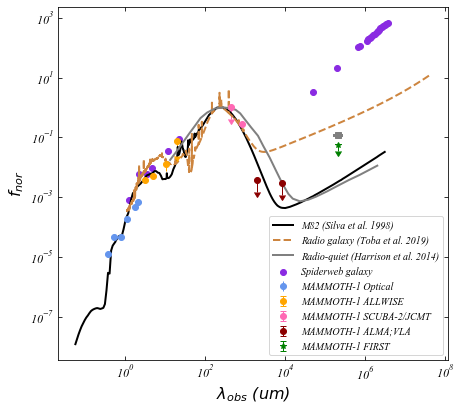

In [16]:
fig,ax=plt.subplots(1,1)

#plot M82 sed
ax.plot(wave,flux_nu,lw=2.,color='black',label='M82 (Silva et al. 1998)')
ax.plot(rg_sed_template[:,0]*13,rg_sed_template[:,1]*0.2,
        lw=2.,linestyle='dashed',color='peru',label='Radio galaxy (Toba et al. 2019)')
#plot harrison_2014 sed
ax.plot(wave_harr*3.3,flux_harr,lw=2,color='gray',label='Radio-quiet (Harrison et al. 2014)')

ax.scatter(spider_sed_flux[:,0],spider_sed_flux[:,1],
           color='blueviolet',label='Spiderweb galaxy')

ax.errorbar(wave_mammoth_optical,flux_mammoth_optical,marker='o',
            yerr=err_mammoth_optical,color='cornflowerblue',
            alpha=1,linestyle='none',label='MAMMOTH-1 Optical')
ax.errorbar(wave_mammoth_aw,flux_mammoth_aw,
            uplims=np.array([0,0,0,1],dtype=bool),yerr=err_mammoth_aw,
            color='orange',marker='o',alpha=1,linestyle='none'
            ,label='MAMMOTH-1 ALLWISE')
ax.errorbar(wave_mammoth_other,flux_mammoth_other,marker='o',
            yerr=err_mammoth_other,color='hotpink',alpha=1,
            uplims=np.array([1,0],dtype=bool),
            linestyle='none',label='MAMMOTH-1 SCUBA-2/JCMT')
ax.errorbar(wave_mammoth_up,flux_mammoth_up,
            yerr=np.array([3e-2,4e-2])/flux_mammoth_max,
            uplims=np.array([1,1],dtype=bool),
            color='darkred',alpha=1,marker='o',
            linestyle='none',label='MAMMOTH-1 ALMA;VLA')
ax.errorbar(np.array([214137.47]),flux_14_harr,
            yerr=err_14_harr,color='gray',marker='s',
            linestyle='none',lw=10)
ax.errorbar(wave_mammoth_first,flux_mammoth_first,
            yerr=wave_mammoth_first*1e-7,
            uplims=np.array([1],dtype=bool),
            color='green',alpha=1,marker='*',
            linestyle='none',label='MAMMOTH-1 FIRST')
ax.set_xlabel(r'$\rm \lambda_{obs} \ (um)$')
ax.set_ylabel(r'$\rm f_{nor}$')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()
dicf='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
plt.rcParams['figure.figsize'] = [7, 6.5]
# plt.show()
plt.savefig(dicf+'SED_fitting.png',dpi=300)